In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score

In [2]:
#dataframe
df = pd.read_csv("constructor_standings2.csv")
X = df[["constructorId", "points", "position"]]
X

,constructorId,points,position
0,1,14.0,1
1,3,9.0,2
2,6,1.0,6
3,1,24.0,1
4,3,9.0,4
...,...,...,...
3713,9,396.0,1
3714,6,334.0,2
3715,131,304.0,3
3716,210,34.0,7


C:\Users\aleol\AppData\Local\Temp\ipykernel_17300\1453427688.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'position')

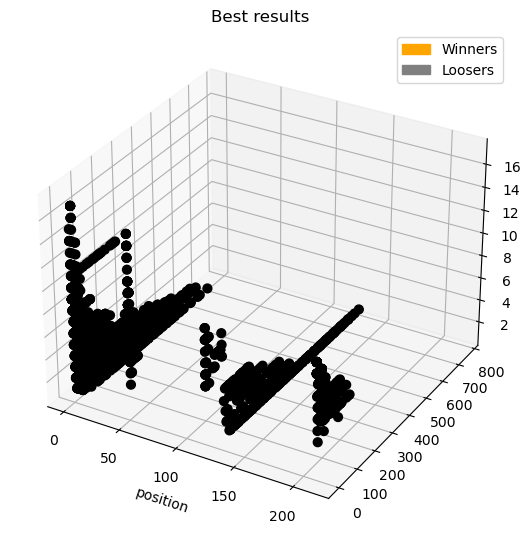

In [3]:
x = X.iloc[:, 0] #constructorsId
y = X.iloc[:, 1] #points
z = X.iloc[:, 2] #position

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

colors = {'Wineres':'orange', 
          'Loosers':'grey'}

ax.scatter(x,y,z, s=40, c=df["wins"].map(colors), marker='o', 
           alpha=1)

orange_patch = mpatches.Patch(color='orange', label='Winners')
grey_patch = mpatches.Patch(color='grey', label='Loosers')
# lightblue_patch = mpatches.Patch(color='lightblue', label='Iris-virginica')
ax.legend(handles=[orange_patch, grey_patch])

plt.title("Best results")

ax.set_xlabel('constructorId')
ax.set_xlabel('points')
ax.set_xlabel('position')

In [4]:
from sklearn.cluster import AgglomerativeClustering

hc= AgglomerativeClustering(n_clusters=2, linkage="ward")
hc = hc.fit(X)
hc.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

C:\Users\aleol\AppData\Local\Temp\ipykernel_17300\1710667836.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'position')

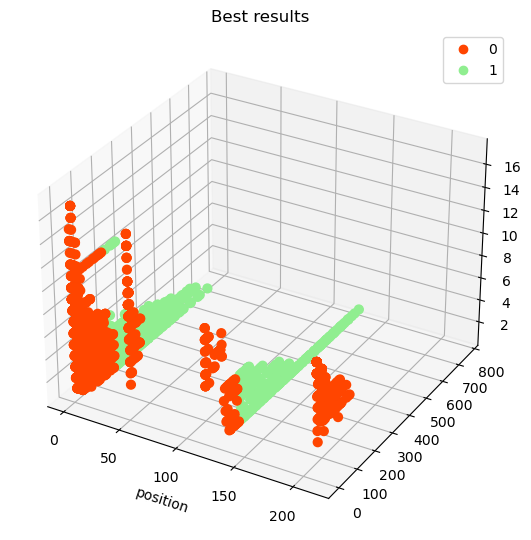

In [9]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["orangered", "lightgreen"])

x = X.iloc[:, 0]
y = X.iloc[:, 1]
z = X.iloc[:, 2]

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

sc = ax.scatter(x,y,z, s=40,c = hc.labels_, cmap = cmap , marker='o', 
           alpha=1)

plt.legend(*sc.legend_elements())

plt.title("Best results")

ax.set_xlabel('constructorId')
ax.set_xlabel('points')
ax.set_xlabel('position')

Text(0.5, 0, 'Constructor')

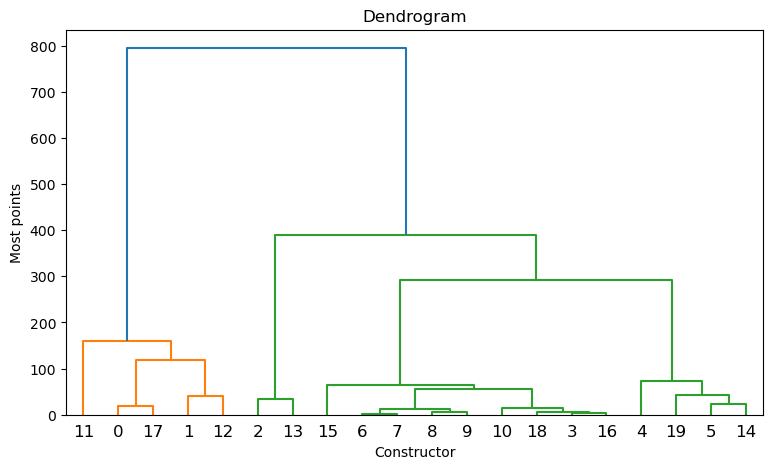

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage = linkage(X.sample(n=20, random_state=1), 'ward')

plt.figure(figsize=(9,5))

dendrogram(linkage, orientation='top')

plt.title("Dendrogram")

plt.ylabel("Most points")
plt.xlabel("Constructor")

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

y = df['wins']

y_pred = hc.predict(hc)

confusion_matrix(y ,y_pred)

plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# print(classification_report(y_test, y_pred))

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [ ]:
score = accuracy_score(hc, predictions)
print(f"Acurracy of test: {np.mean(score) * 100:2f}%")